## Imports

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx 
import folium
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import json

import random
import os 

### Exploring the train lines

In [2]:
lines_df = pd.read_csv("data/linie-mit-polygon.csv", delimiter=";") 

lines_df.head()

Geo point  \
0   47.21976912299228, 8.808646167429176   
1    47.18557904508911, 6.91404312078451   
2     47.2030617598106, 8.78192821701766   
3   47.51164288195099, 8.368444732796242   
4  46.980134078491794, 6.827839530302453   

                                           Geo shape TRACK GAUGE   KM START  \
0  {"coordinates": [[8.816764778632129, 47.224802...           N     21.012   
1  {"coordinates": [[6.905882565188336, 47.176839...           M  27771.000   
2  {"coordinates": [[8.778163169450705, 47.203273...           N  33438.894   
3  {"coordinates": [[8.369558383296539, 47.511128...           N  25185.864   
4  {"coordinates": [[6.813550934223624, 46.968421...           N  10584.900   

      KM END START_OP              START_OP.1 END_OP  \
0   1744.514       RW           Rapperswil SG    HUR   
1  30177.000     BOEC              Le Boéchet   BOIS   
2  34011.375       PF            Pfäffikon SZ   PFOS   
3  25388.895       NW          Niederweningen   NWGE   
4  14060.000     CHNN  Chambrelien Nord (bif)    MML   

                     END_OP.1  Linie                                     Line  
0                      Hurden    671         Rapperswil - Pfäffikon Ost (SOB)  
1                    Les Bois    235                   Tavannes - Le Noirmont  
2     Pfäffikon SZ Ost (Abzw)    720  ZH Langstrasse - Thalwil - Ziegelbrücke  
3  Niederweningen (Gleisende)    761     Oberglatt - Niederweningen Gleisende  
4      Montmollin-Montezillon    224    Chambrelien Nord - Le Locle frontière

In [3]:
lines_df['Geo shape'][0]

'{"coordinates": [[8.816764778632129, 47.224802852486135], [8.816634416211253, 47.22478858845543], [8.81650405385998, 47.224774324277], [8.816373691578317, 47.22476005995085], [8.81624332936631, 47.22474579547701], [8.816112966992074, 47.224731521862275], [8.81598266397298, 47.22471698650613], [8.81585261276117, 47.22470145842973], [8.81572304495625, 47.22468418819479], [8.815594244970244, 47.22466442573283], [8.815466553270781, 47.22464154625077], [8.815340217692906, 47.22461542984136], [8.815215398063588, 47.22458612857493], [8.815092266714924, 47.22455366738476], [8.814970996904195, 47.22451810717796], [8.814851761423869, 47.224479490875595], [8.814734733064853, 47.22443786139949], [8.81462004593864, 47.224393298118144], [8.81450789923527, 47.22434584363895], [8.814398413629648, 47.22429556849583], [8.814291762831413, 47.22424255158541], [8.81418809391409, 47.224186863127024], [8.814087553949069, 47.22412857334022], [8.813990264297548, 47.224067779739855], [8.813896216157868, 47.224

<Axes: >

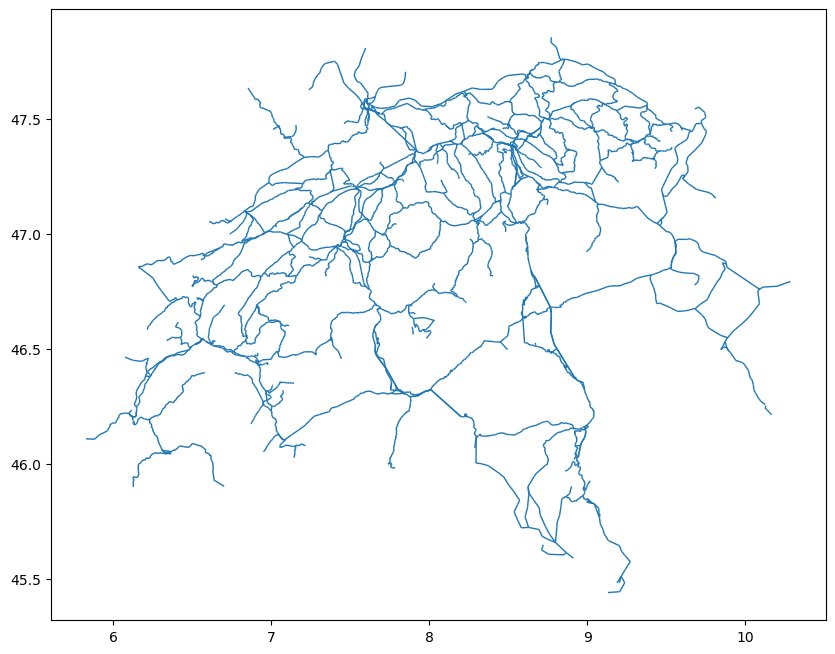

In [4]:
# Convert Geo shape strings to actual LineString geometries
def parse_linestring(geo_shape_str):
    geojson = json.loads(geo_shape_str)
    return LineString(geojson['coordinates'])

lines_df['geometry'] = lines_df['Geo shape'].apply(parse_linestring)

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(lines_df, geometry='geometry', crs="EPSG:4326")

# Plot using GeoPandas
gdf.plot(figsize=(10, 10), linewidth=1)

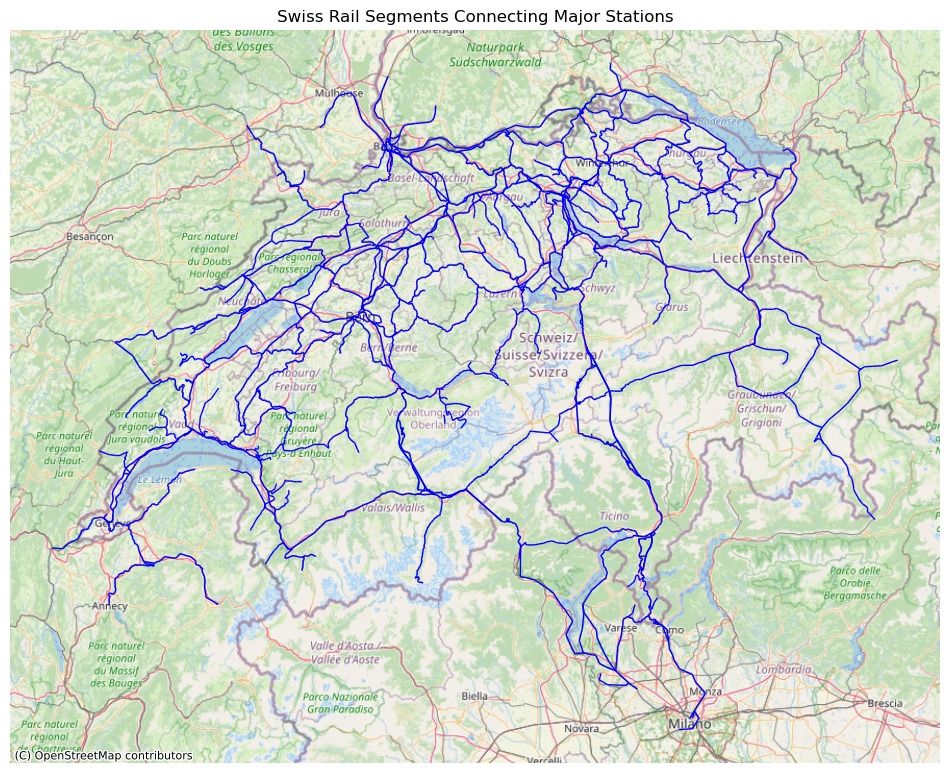

In [5]:
import contextily as ctx
import matplotlib.pyplot as plt

# Reproject to Web Mercator (EPSG:3857), required by contextily
gdf_3857 = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_3857.plot(ax=ax, linewidth=1, edgecolor='blue')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title("Swiss Rail Segments Connecting Major Stations")
plt.show()

### Looking at the main train lines connecting our major cities

In [6]:
import re

major_stations = [
    'Bern', 'Basel SBB', 'Lausanne', 'Luzern', 'St. Gallen',
    'Winterthur', 'Zug', 'Aarau', 'Baden', 'Biel/Bienne', 'Chur',
    'Fribourg/Freiburg', 'Genève-Aéroport', 'Genève', 'Neuchâtel',
    'Olten', 'Thun', 'Zürich Altstetten', 'Zürich Enge',
    'Zürich Hardbrücke', 'Zürich Stadelhofen', 'Bellinzona', 'Lugano', 'Lugano Nord',
    'Zürich Oerlikon', 'Uster', 'Genève-Eaux-Vives', 'Zürich HB', 'Zürich'
]


In [7]:
lines_df.head()

Geo point  \
0   47.21976912299228, 8.808646167429176   
1    47.18557904508911, 6.91404312078451   
2     47.2030617598106, 8.78192821701766   
3   47.51164288195099, 8.368444732796242   
4  46.980134078491794, 6.827839530302453   

                                           Geo shape TRACK GAUGE   KM START  \
0  {"coordinates": [[8.816764778632129, 47.224802...           N     21.012   
1  {"coordinates": [[6.905882565188336, 47.176839...           M  27771.000   
2  {"coordinates": [[8.778163169450705, 47.203273...           N  33438.894   
3  {"coordinates": [[8.369558383296539, 47.511128...           N  25185.864   
4  {"coordinates": [[6.813550934223624, 46.968421...           N  10584.900   

      KM END START_OP              START_OP.1 END_OP  \
0   1744.514       RW           Rapperswil SG    HUR   
1  30177.000     BOEC              Le Boéchet   BOIS   
2  34011.375       PF            Pfäffikon SZ   PFOS   
3  25388.895       NW          Niederweningen   NWGE   
4  14060.000     CHNN  Chambrelien Nord (bif)    MML   

                     END_OP.1  Linie                                     Line  \
0                      Hurden    671         Rapperswil - Pfäffikon Ost (SOB)   
1                    Les Bois    235                   Tavannes - Le Noirmont   
2     Pfäffikon SZ Ost (Abzw)    720  ZH Langstrasse - Thalwil - Ziegelbrücke   
3  Niederweningen (Gleisende)    761     Oberglatt - Niederweningen Gleisende   
4      Montmollin-Montezillon    224    Chambrelien Nord - Le Locle frontière   

                                            geometry  
0  LINESTRING (8.816764778632129 47.2248028524861...  
1  LINESTRING (6.905882565188336 47.1768391078522...  
2  LINESTRING (8.778163169450705 47.2032732950830...  
3  LINESTRING (8.369558383296539 47.5111287803333...  
4  LINESTRING (6.813550934223624 46.9684210833008...

In [8]:
#lines_list = [100, 250, 111, 102, 150, 175, 176, 200, 210, 251, 223, 224, 253, 252, 251, 330, 300, 310, 260, 410, 415, 400, 469,470, 500, 460, 230, 226, 225, 450, 540, 700, 720, 722, 651, 653, 710, 720, 660, 890, 900,880,850,751, 752, 595, 580, 600, 290, 650, 700]


### The following are lines that are either InterCity lines or InterRegional lines : (SBB website)
lines_list =[100, 150, 200, 210, 226, 230, 232, 250, 260, 290, 330, 300, 310, 410, 450, 500, 540, 600, 650, 653, 660, 720, 710, 751, 850, 880, 890, 900] 

lines_with_connections = lines_df[lines_df['Linie'].isin(lines_list)]

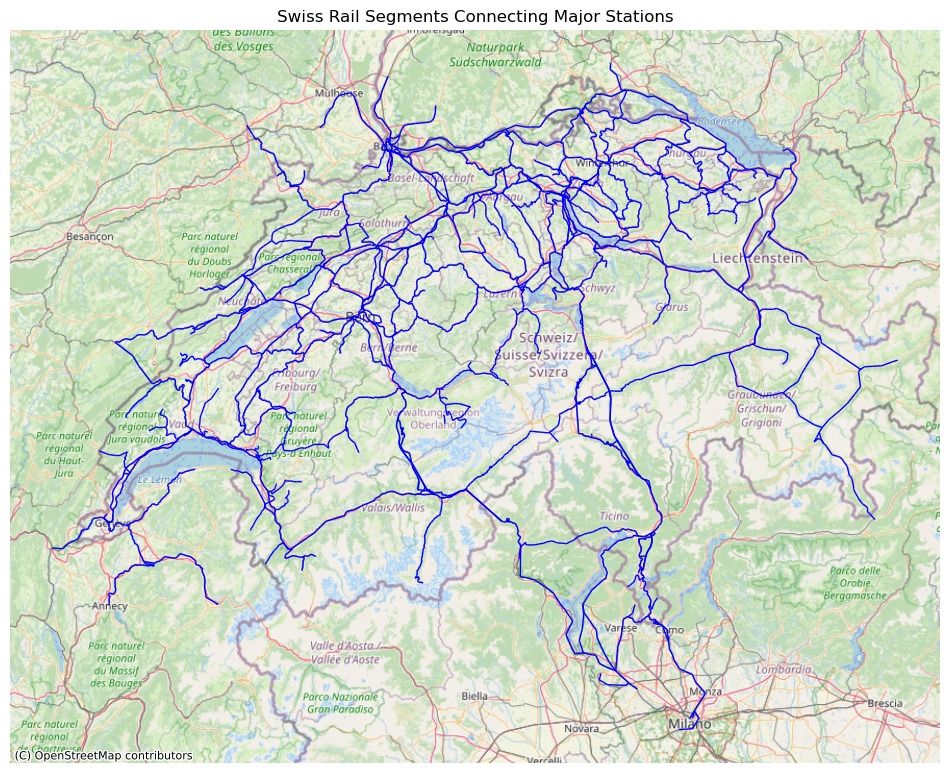

In [9]:
import contextily as ctx
import matplotlib.pyplot as plt

# Reproject to Web Mercator (EPSG:3857), required by contextily
gdf_3857 = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(12, 12))
gdf_3857.plot(ax=ax, linewidth=1, edgecolor='blue')

# Add basemap (you can change to other providers below)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Optional: remove axis for cleaner map
ax.set_axis_off()
plt.title("Swiss Rail Segments Connecting Major Stations")
plt.show()

### Creating a network with only the main stations and main lines

In [10]:
nodes = set(list(lines_with_connections['START_OP.1'].unique()) + list(lines_with_connections['END_OP.1'].unique()))

common_nodes = nodes.intersection(set(major_stations))
#print(set(common_nodes))

only_in_stations = set(major_stations) - set(common_nodes)
print('Missing nodes in our network :', only_in_stations)

Missing nodes in our network : {'Genève-Eaux-Vives', 'Uster', 'Zürich Stadelhofen', 'Zürich'}


In [11]:
lines_with_connections = lines_with_connections.copy()
lines_with_connections['DISTANCE'] = lines_with_connections['KM END'] - lines_with_connections['KM START']
lines_with_connections.head()

Geo point  \
2      47.2030617598106, 8.78192821701766   
59   46.52972611489423, 6.594751442416671   
62   47.32597653390688, 7.831142861718467   
68   47.38996444072213, 8.499420125146317   
69  47.377823872087305, 8.519314484576606   

                                            Geo shape TRACK GAUGE   KM START  \
2   {"coordinates": [[8.778163169450705, 47.203273...           N  33438.894   
59  {"coordinates": [[6.602682956893264, 46.526766...           N   2354.000   
62  {"coordinates": [[7.843880612776063, 47.330176...           N  45302.790   
68  {"coordinates": [[8.503689671182817, 47.389008...           N   3019.841   
69  {"coordinates": [[8.52014614275759, 47.3788220...           N   1962.651   

       KM END START_OP                    START_OP.1 END_OP  \
2   34011.375       PF                  Pfäffikon SZ   PFOS   
59   3757.235     PRMA                 Prilly-Malley   RENB   
62  47447.675      HAE                     Hägendorf    HRK   
68   3695.747     ZHDW  Zürich Hardbrücke West (Spw)   ZASO   
69   2227.101      ZAU      Zürich Aussersihl (Abzw)   ZLOG   

                        END_OP.1  Linie  \
2        Pfäffikon SZ Ost (Abzw)    720   
59           Renens VD Est (bif)    150   
62                Härkingen Post    410   
68  Zürich Altstetten Ost (Abzw)    710   
69       Zürich Lochergut (Abzw)    720   

                                       Line  \
2   ZH Langstrasse - Thalwil - Ziegelbrücke   
59               Lausanne - Genève-Aéroport   
62          Olten - Solothurn - Biel/Bienne   
68                     Zürich HB - Brugg AG   
69  ZH Langstrasse - Thalwil - Ziegelbrücke   

                                             geometry  DISTANCE  
2   LINESTRING (8.778163169450705 47.2032732950830...   572.481  
59  LINESTRING (6.602682956893264 46.5267668848065...  1403.235  
62  LINESTRING (7.843880612776063 47.3301769942711...  2144.885  
68  LINESTRING (8.503689671182817 47.3890081302628...   675.906  
69  LINESTRING (8.52014614275759 47.37882207014244...   264.450

#### Noeuds enlevés :

- Uster
- Zurich stadelhof
- Geneve-eax-vives

In [12]:
major_stations = ['Bern', 'Basel SBB', 'Lausanne', 'Luzern', 'St. Gallen',
       'Winterthur', 'Zug', 'Aarau', 'Baden', 'Biel/Bienne', 'Chur',
       'Fribourg/Freiburg', 'Genève-Aéroport', 'Genève', 'Neuchâtel',
       'Olten', 'Thun', 'Zürich Altstetten', 'Zürich Enge',
       'Zürich Hardbrücke', 'Bellinzona', 'Lugano',
       'Zürich Oerlikon', 'Zürich HB']

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


df = lines_with_connections

# Build the original graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['START_OP.1'], row['END_OP.1'], weight=row['DISTANCE'])

important_nodes = set(major_stations)

# New simplified graph
H = nx.Graph()

# For each important node, do Dijkstra to find shortest paths to all others
for source in important_nodes:
    paths = nx.single_source_dijkstra_path(G, source, weight='weight')
    
    for target, path in paths.items():
        if target == source:
            continue

        # Skip if path doesn't contain at least one node in between
        if len(path) < 2:
            continue

        # Break path into segments between important nodes
        segment = [source]
        for node in path[1:]:
            if node in important_nodes:
                if segment[-1] != node:
                    # Add edge for segment between two important nodes
                    try:
                        seg_path = nx.shortest_path(G, source=segment[0], target=node, weight='weight')
                        seg_length = nx.path_weight(G, seg_path, weight='weight')
                        H.add_edge(segment[0], node, weight=seg_length)
                    except nx.NetworkXNoPath:
                        pass
                segment = [node]
            else:
                segment.append(node)

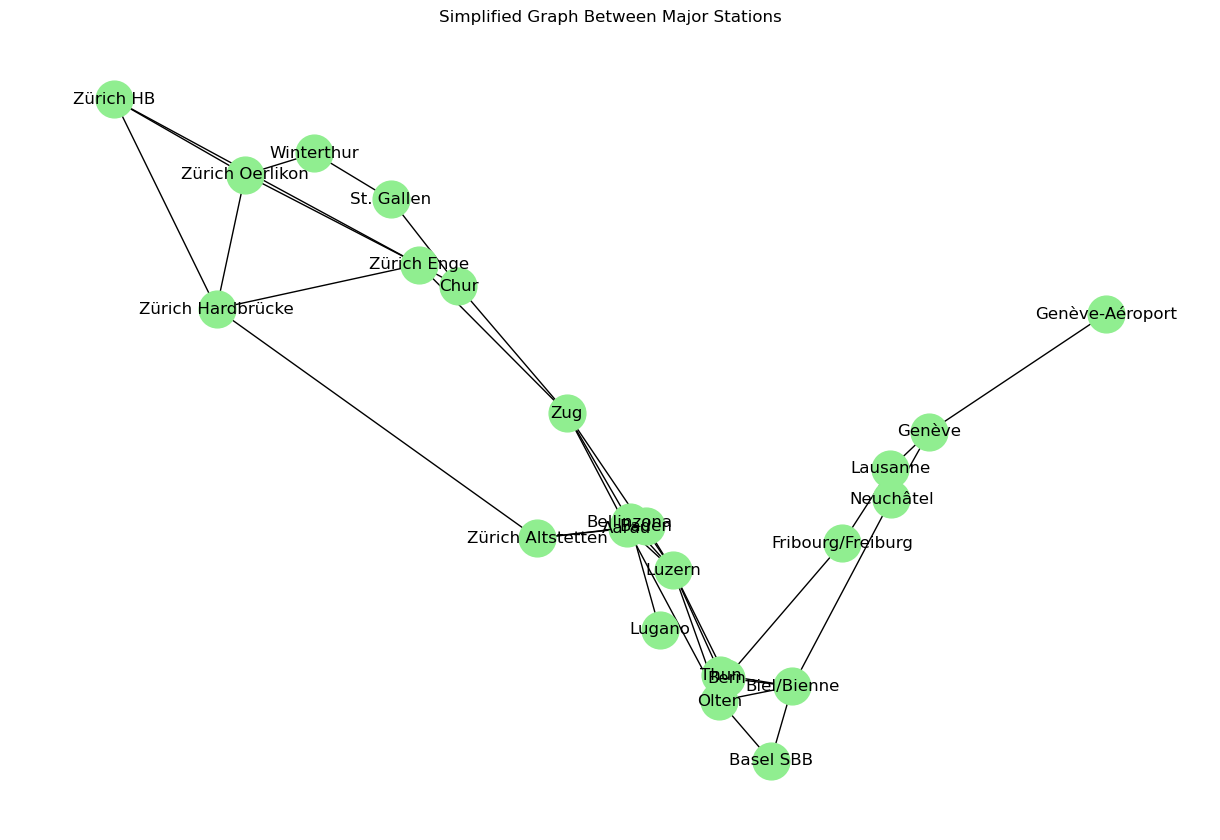

In [14]:
plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_color='lightgreen', node_size=700)
#nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_weights, font_color='red')
plt.title("Simplified Graph Between Major Stations")
plt.show()

In [15]:
edge_labels = nx.get_edge_attributes(H, 'weight')

edge_labels

{('Zürich HB', 'Zürich Hardbrücke'): 1918.342,
 ('Zürich HB', 'Zürich Enge'): 3639.969,
 ('Zürich HB', 'Zürich Oerlikon'): 5368.4169999999995,
 ('Zürich Hardbrücke', 'Zürich Altstetten'): 2247.158,
 ('Zürich Hardbrücke', 'Zürich Enge'): 3715.759,
 ('Zürich Hardbrücke', 'Zürich Oerlikon'): 5444.207,
 ('Zürich Enge', 'Zug'): 25289.729,
 ('Zürich Enge', 'Chur'): 112435.43299999999,
 ('Zürich Enge', 'Zürich Oerlikon'): 7165.834000000001,
 ('Zürich Altstetten', 'Baden'): 18421.675,
 ('Zürich Altstetten', 'Aarau'): 37327.405,
 ('Zürich Oerlikon', 'Winterthur'): 21418.95,
 ('Baden', 'Aarau'): 31068.561999999998,
 ('Baden', 'Luzern'): 73096.897,
 ('Baden', 'Bellinzona'): 213342.326,
 ('Winterthur', 'St. Gallen'): 57139.041999999994,
 ('Zug', 'Luzern'): 28417.295000000006,
 ('Zug', 'Bellinzona'): 168662.72400000002,
 ('Zug', 'Aarau'): 56943.562000000005,
 ('Zug', 'Chur'): 121403.1,
 ('Aarau', 'Olten'): 13373.403999999995,
 ('Aarau', 'Bellinzona'): 205264.64000000007,
 ('Aarau', 'Luzern'): 65019

In [16]:
# Extract edges with weights from the simplified graph H
edge_data = [
    {'start_node': u, 'end_node': v, 'distance [m]': d['weight']}
    for u, v, d in H.edges(data=True)
]

# Convert to DataFrame
df_links = pd.DataFrame(edge_data)

# Preview
df_links

start_node           end_node  distance [m]
0           Zürich HB  Zürich Hardbrücke      1918.342
1           Zürich HB        Zürich Enge      3639.969
2           Zürich HB    Zürich Oerlikon      5368.417
3   Zürich Hardbrücke  Zürich Altstetten      2247.158
4   Zürich Hardbrücke        Zürich Enge      3715.759
5   Zürich Hardbrücke    Zürich Oerlikon      5444.207
6         Zürich Enge                Zug     25289.729
7         Zürich Enge               Chur    112435.433
8         Zürich Enge    Zürich Oerlikon      7165.834
9   Zürich Altstetten              Baden     18421.675
10  Zürich Altstetten              Aarau     37327.405
11    Zürich Oerlikon         Winterthur     21418.950
12              Baden              Aarau     31068.562
13              Baden             Luzern     73096.897
14              Baden         Bellinzona    213342.326
15         Winterthur         St. Gallen     57139.042
16                Zug             Luzern     28417.295
17                Zug         Bellinzona    168662.724
18                Zug              Aarau     56943.562
19                Zug               Chur    121403.100
20              Aarau              Olten     13373.404
21              Aarau         Bellinzona    205264.640
22              Aarau             Luzern     65019.211
23              Olten          Basel SBB     39172.397
24              Olten        Biel/Bienne     60070.608
25              Olten               Bern     65626.280
26              Olten               Thun     93127.178
27              Olten             Luzern     55768.093
28             Luzern               Thun    147480.179
29             Luzern               Bern    119979.281
30             Luzern         Bellinzona    176738.373
31         St. Gallen               Chur    106155.250
32          Basel SBB        Biel/Bienne     73186.658
33        Biel/Bienne          Neuchâtel     29200.120
34        Biel/Bienne               Thun     60962.567
35        Biel/Bienne               Bern     33461.669
36               Bern  Fribourg/Freiburg     31109.895
37               Bern               Thun     31264.012
38          Neuchâtel             Genève    124954.163
39          Neuchâtel           Lausanne     75087.957
40  Fribourg/Freiburg           Lausanne     65778.350
41         Bellinzona             Lugano     29554.996
42           Lausanne             Genève     60226.630
43             Genève    Genève-Aéroport      5918.188

In [18]:
import pandas as pd
import numpy as np

# Your ordered list of cities
cities = ['Genève-Aéroport', 'Genève', 'Zürich Altstetten',
          'Zürich Hardbrücke', 'Zürich Oerlikon', 'Zürich HB', 'Zürich Enge',
          'Thun', 'Basel SBB', 'Lausanne', 'Winterthur', 'St. Gallen',
          'Luzern', 'Lugano', 'Baden', 'Fribourg/Freiburg', 'Biel/Bienne',
          'Neuchâtel', 'Bellinzona', 'Zug', 'Bern', 'Olten', 'Chur', 'Aarau']

# Initialize a matrix with -1 (or np.inf for unconnected)
n = len(cities)
matrix = np.full((n, n), -1.0)
np.fill_diagonal(matrix, 0)

# Mapping city name to index
city_index = {city: i for i, city in enumerate(cities)}

# Assume df_links already exists with 'start_node', 'end_node', 'distance [m]'
for _, row in df_links.iterrows():
    u, v, dist = row['start_node'], row['end_node'], row['distance [m]']
    if u in city_index and v in city_index:
        i, j = city_index[u], city_index[v]
        matrix[i, j] = matrix[j, i] = dist

# Create DataFrame for readability
df_matrix = pd.DataFrame(matrix, index=cities, columns=cities)

# Display or export
df_matrix # Show rounded output
# df_matrix.to_csv("distance_matrix_from_links.csv")

                   Genève-Aéroport    Genève  Zürich Altstetten  \
Genève-Aéroport                0.0    5918.2               -1.0   
Genève                      5918.2       0.0               -1.0   
Zürich Altstetten             -1.0      -1.0                0.0   
Zürich Hardbrücke             -1.0      -1.0             2247.2   
Zürich Oerlikon               -1.0      -1.0               -1.0   
Zürich HB                     -1.0      -1.0               -1.0   
Zürich Enge                   -1.0      -1.0               -1.0   
Thun                          -1.0      -1.0               -1.0   
Basel SBB                     -1.0      -1.0               -1.0   
Lausanne                      -1.0   60226.6               -1.0   
Winterthur                    -1.0      -1.0               -1.0   
St. Gallen                    -1.0      -1.0               -1.0   
Luzern                        -1.0      -1.0               -1.0   
Lugano                        -1.0      -1.0               -1.